In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [3]:
# Flatten the 28x28 images into 1D arrays of size 784
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (60000, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Shape: (10000, 784)

# Apply UMAP
import umap
umap_reducer = umap.UMAP(n_components=2, n_jobs=1, random_state=42)

# Transform the flattened data
X_train_umap = umap_reducer.fit_transform(X_train_flat)
X_test_umap = umap_reducer.transform(X_test_flat)

In [4]:
num_clusters=10

kmeans1 = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans1.fit(X_train_umap)

y_kmeans1 = kmeans1.predict(X_test_umap)

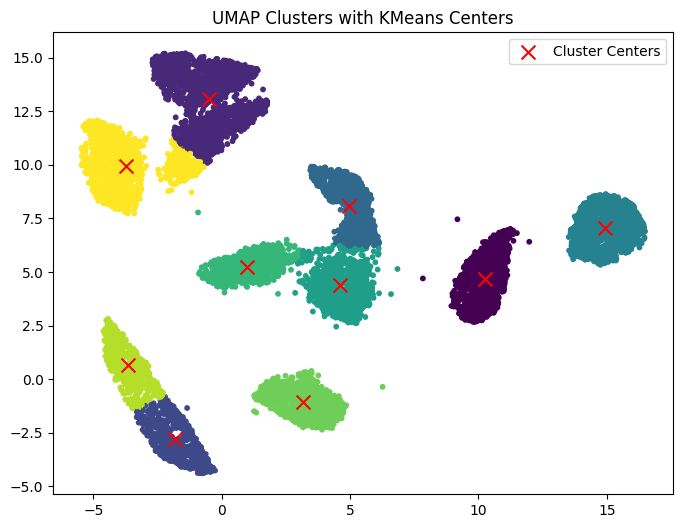

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of the UMAP-reduced data and cluster centers
plt.figure(figsize=(8, 6))

# Plot the UMAP-transformed test data points and color them by their cluster
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_kmeans1, cmap='viridis', s=10)

# Plot the KMeans cluster centers
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], 
            c='red', marker='x', s=100, label='Cluster Centers')

plt.title('UMAP Clusters with KMeans Centers')
plt.legend()
plt.show()

In [7]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test_umap, y_kmeans1)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.6199


In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_test, y_kmeans1)
nmi = normalized_mutual_info_score(y_test, y_kmeans1)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {score:.4f}")

Adjusted Rand Index: 0.7548
Normalized Mutual Info: 0.6199


In [ ]:
# Tes

For n_clusters = 2, the silhouette score is 0.5614
For n_clusters = 3, the silhouette score is 0.5917
For n_clusters = 4, the silhouette score is 0.4991
For n_clusters = 5, the silhouette score is 0.4330
For n_clusters = 6, the silhouette score is 0.3385
For n_clusters = 7, the silhouette score is 0.3438
For n_clusters = 8, the silhouette score is 0.3517
For n_clusters = 9, the silhouette score is 0.3503
For n_clusters = 10, the silhouette score is 0.3394


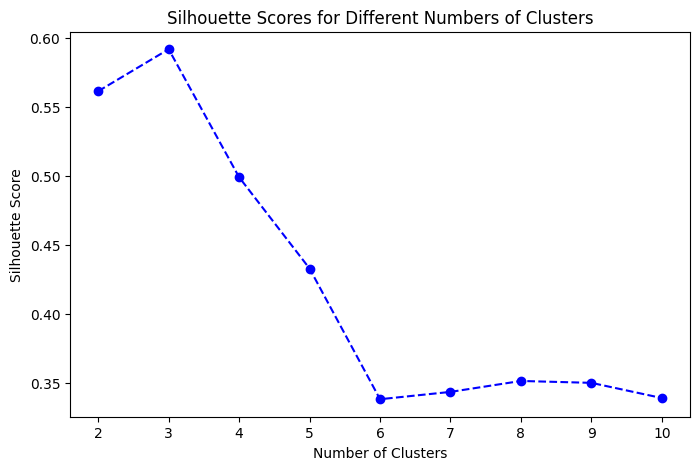

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X_test_umap, y_test = make_blobs(n_samples=300, cluster_std=1, random_state=12)

# Test different numbers of clusters (1 to 10)
silhouette_scores = []
num_clusters_range = range(2, 11)

for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_test_umap)
    
    # Calculate silhouette score
    score = silhouette_score(X_test_umap, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.4f}")

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

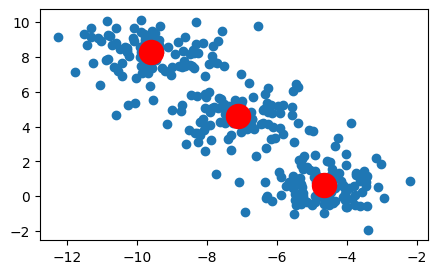

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

kmeans = KMeans(n_clusters=3, n_init=10)
pred_y = kmeans.fit_predict(X_test_umap)
X_test_umap, y_test = make_blobs(n_samples=300, cluster_std=1, random_state=12)
plt.figure(figsize=(5,3))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

In [12]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test_umap, pred_y)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5917
